<a href="https://colab.research.google.com/github/nfonteyne/Audio_Sample_Listenable/blob/main/Information_librosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ce notebook à pour but d'améliorer la compréhension de la librairie python Librosa dans le cadre de notre projet de 5e année**

Pour comprendre la librairie j'ai utilisé ce notebook : https://www.kaggle.com/code/robikscube/working-with-audio-in-python/notebook

les sources vers les informations supplémentaires sont écrites aux endroits où les infos sont utilisées.

### Dans un premier temps on importe les bibliothèques qui nous seront utiles

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob
#Le module glob recherche tous les chemins correspondant à un motif 
#particulier selon les règles utilisées par le shell Unix, les résultats sont renvoyés dans un ordre arbitraire.

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


### On passe maintenant à la lecture des fichiers audios

Important❗le fichier utilisé pour l'obtention des différents graphiques est le 00000.

Pensez bien à le mettre dans le répertoire courant pour obtenir des résultats. 😊

In [ ]:
audio_files = glob('./*.wav')
#on recupères tous les fichiers .wav de notre repertoire dans la variables "audio_files"

In [ ]:
#On peut écouter avec cette ligne de commande les fichiers audio que l'on a placer dans "audio_files"
ipd.Audio(audio_files[0])

#### **librosa.load() explication trouvée dans la doc :**
lien vers la doc : https://librosa.org/doc/main/generated/librosa.load.html

Load an audio file as a floating point time series.

Audio will be automatically resampled to the given rate (default sr=22050).

To preserve the native sampling rate of the file, use sr=None.

In [ ]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [-7.5550832e-07  1.0226838e-06 -1.2791763e-06  1.5029752e-06
 -1.6730863e-06  1.7749246e-06 -1.8128379e-06  1.8518842e-06
 -2.2444847e-06  6.9662669e-06]
shape y: (22528,)
sr: 22050


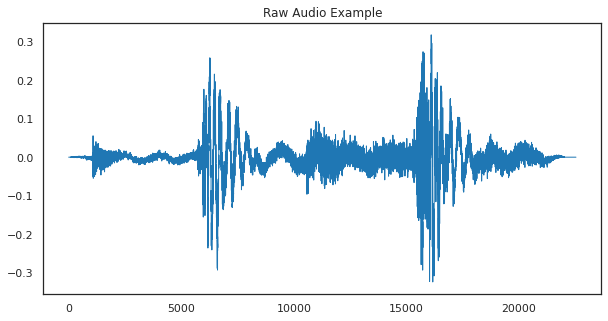

In [ ]:
#On trace notre time serie y
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

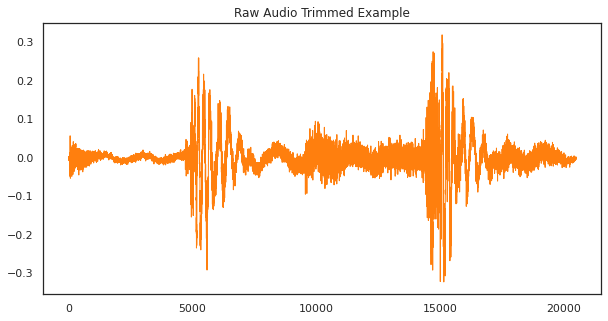

In [ ]:
#On coupe le son pour enlever les silences

#on garde en tête que ce ne sera pas forcément necessaire de faire ça pour notre
#projet car on veut analyser les extraits entiers pour leur donner une note

y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()

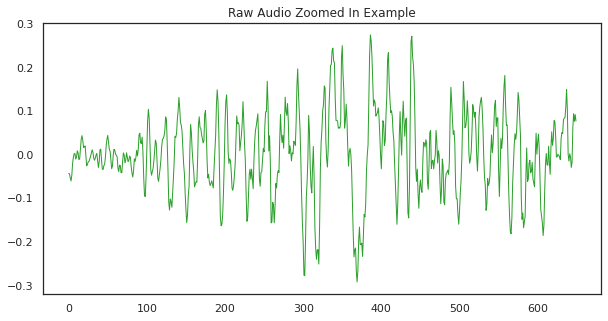

In [ ]:
pd.Series(y[15350:16000]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

###Spectrogramme

Le spectrogramme est une représentation permettant de voir l'ensemble de la décomposition spectrale de la voix et de la parole sur une même représentation graphique. Cet outil se révèle précis, informatif et fiable pour analyser les caractéristiques de la production sonore 

source : https://hal.archives-ouvertes.fr/hal-03107434/document

**Informations sur librosa.stft :**
lien : https://librosa.org/doc/main/generated/librosa.stft.html

Short-time Fourier transform (STFT).

The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows.

In [ ]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# librosa.amplitude_to_db : Convert an amplitude spectrogram to dB-scaled spectrogram.
S_db.shape

(1025, 45)

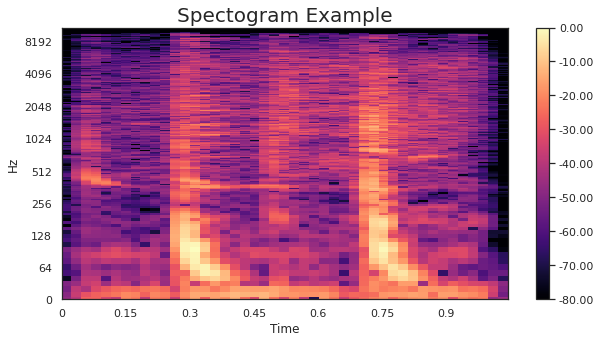

In [ ]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

## Mel spectrogamme

Possiblement intéressant de se renseigner à fond dessus en vu de l'uitliser dans un réseau de neuronne

Quelques liens vers des articles scientifiques à lire allant vers cette idée :



*   **Audio Recognition using Mel Spectrograms and Convolution Neural Networks** ==> http://noiselab.ucsd.edu/ECE228_2019/Reports/Report38.pdf
*   **Audio Deep Learning Made Simple (Part 2): Why Mel Spectrograms perform better** ==> https://towardsdatascience.com/audio-deep-learning-made-simple-part-2-why-mel-spectrograms-perform-better-aad889a93505
* **Cough Recognition Based on Mel-Spectrogram and Convolutional Neural Network** ==> https://www.frontiersin.org/articles/10.3389/frobt.2021.580080/full


**Qu'est ce que l'echelle de Mel :**

L'échelle de Mel est une échelle de fréquences basée sur la perception humaine. Elle se mesure en mels.

**Principe :**

Elle a été conçue de telle façon que 1000Hz correspondent à 1000mels et qu'une variation constante dans le domaine des mels soit perçue comme une variation constante de fréquence (en Hz) par les auditeurs.
 
En effet, au-delà de 500Hz, l'oreille humaine ne perçoit plus le changement d'octave comme un doublement de la fréquence. Par contre, si on se place sur une échelle de Mel, un changement d'octave sera effectivement perçu comme un doublement de la fréquence.

In [ ]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

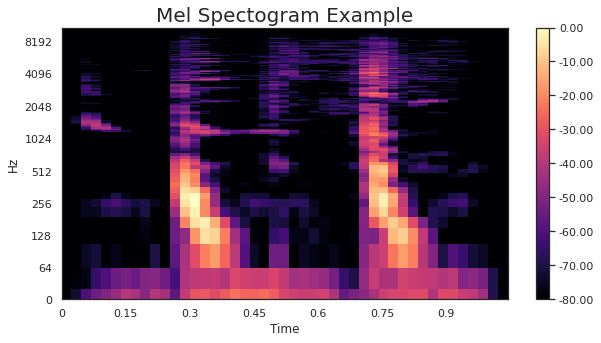

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

### **A creuser :**

* How to apply machine learning and deep learning methods to audio analysis ==> https://towardsdatascience.com/how-to-apply-machine-learning-and-deep-learning-methods-to-audio-analysis-615e286fcbbc
* Machine learning pour la classification automatique ==> https://larevueia.fr/machine-learning-pour-la-classification-automatique-de-musiques-avec-python/